In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**

In [2]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Handling Missing Values

In [4]:
missing_values = train.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [5]:
missing_values =test.isnull().sum()
print(missing_values[missing_values > 0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [5]:
# List of columns to drop due to too many missing values
columns_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [6]:
# Drop columns from both train and test sets
train.drop(columns_to_drop, axis=1, inplace=True)
test.drop(columns_to_drop, axis=1, inplace=True)

In [8]:
def fill_missing_values(df):
    df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
    df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)
    df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)
    df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
    df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
    df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
    df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
    df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)
    df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
    df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0], inplace=True)
    df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)
    df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0], inplace=True)
    df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)
    df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)
    df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)
    df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace=True)
    df['Utilities'].fillna(df['Utilities'].mode()[0], inplace=True)
    df['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace=True)
    df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0], inplace=True)
    df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace=True)
    df['Functional'].fillna(df['Functional'].mode()[0], inplace=True)
    df['SaleType'].fillna(df['SaleType'].mode()[0], inplace=True)
    df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].median(), inplace=True)
    df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].median(), inplace=True)
    df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].median(), inplace=True)
    df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median(), inplace=True)
    df['BsmtFullBath'].fillna(df['BsmtFullBath'].median(), inplace=True)
    df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].median(), inplace=True)
    df['GarageCars'].fillna(df['GarageCars'].median(), inplace=True)
    df['GarageArea'].fillna(df['GarageArea'].median(), inplace=True)

# Apply the function to both train and test sets
fill_missing_values(train)
fill_missing_values(test)


/tmp/ipykernel_33/2222556342.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
/tmp/ipykernel_33/2222556342.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [9]:
# Confirm that missing values are handled
print(train.isnull().sum().sum())  
print(test.isnull().sum().sum())  

0
0


# Encoding Categorical Features

In [10]:
# Identify categorical features
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# Concatenate train and test to apply the same transformations
combined = pd.concat([train, test], sort=False)

# Check for the existence of these columns before encoding
existing_categorical_features = [feature for feature in categorical_features if feature in combined.columns]

# One-hot encode the categorical features
combined = pd.get_dummies(combined, columns=existing_categorical_features)

# Split the data back into train and test sets
train = combined[combined['SalePrice'].notnull()]
test = combined[combined['SalePrice'].isnull()].drop(['SalePrice'], axis=1)

# Separate Features and Target Variable

In [11]:
# Separate features and target variable
X = train.drop(['SalePrice', 'Id'], axis=1)
y = train['SalePrice']
X_test = test.drop(['Id'], axis=1)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Model Training

## Random Forest 

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred_rf = rf.predict(X_val_scaled)

# Calculate RMSE for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))

# Calculate RMSE as a percentage
mean_y_val = np.mean(y_val)
rmse_rf_pct = (rmse_rf / mean_y_val) * 100

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest RMSE as percentage: {rmse_rf_pct:.2f}%')

# Make predictions on the test set
test_predictions_rf = rf.predict(X_test_scaled)

# Prepare the submission file for Random Forest
submission_rf = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': test_predictions_rf
})

submission_rf.to_csv('submission_rf.csv', index=False)
print("Random Forest submission file created.")


Random Forest RMSE: 28628.017060226444
Random Forest RMSE as percentage: 16.01%
Random Forest submission file created.


## Gradient Boosting 

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Train a Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred_gb = gb.predict(X_val_scaled)

# Calculate RMSE for Gradient Boosting
rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred_gb))

# Calculate RMSE as a percentage
mean_y_val = np.mean(y_val)
rmse_gb_pct = (rmse_gb / mean_y_val) * 100

print(f'Gradient Boosting RMSE: {rmse_gb}')
print(f'Gradient Boosting RMSE as percentage: {rmse_gb_pct:.2f}%')

# Make predictions on the test set
test_predictions_gb = gb.predict(X_test_scaled)

# Prepare the submission file for Gradient Boosting
submission_gb = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': test_predictions_gb
})

submission_gb.to_csv('submission_gb.csv', index=False)
print("Gradient Boosting submission file created.")


Gradient Boosting RMSE: 27066.662390173387
Gradient Boosting RMSE as percentage: 15.13%
Gradient Boosting submission file created.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

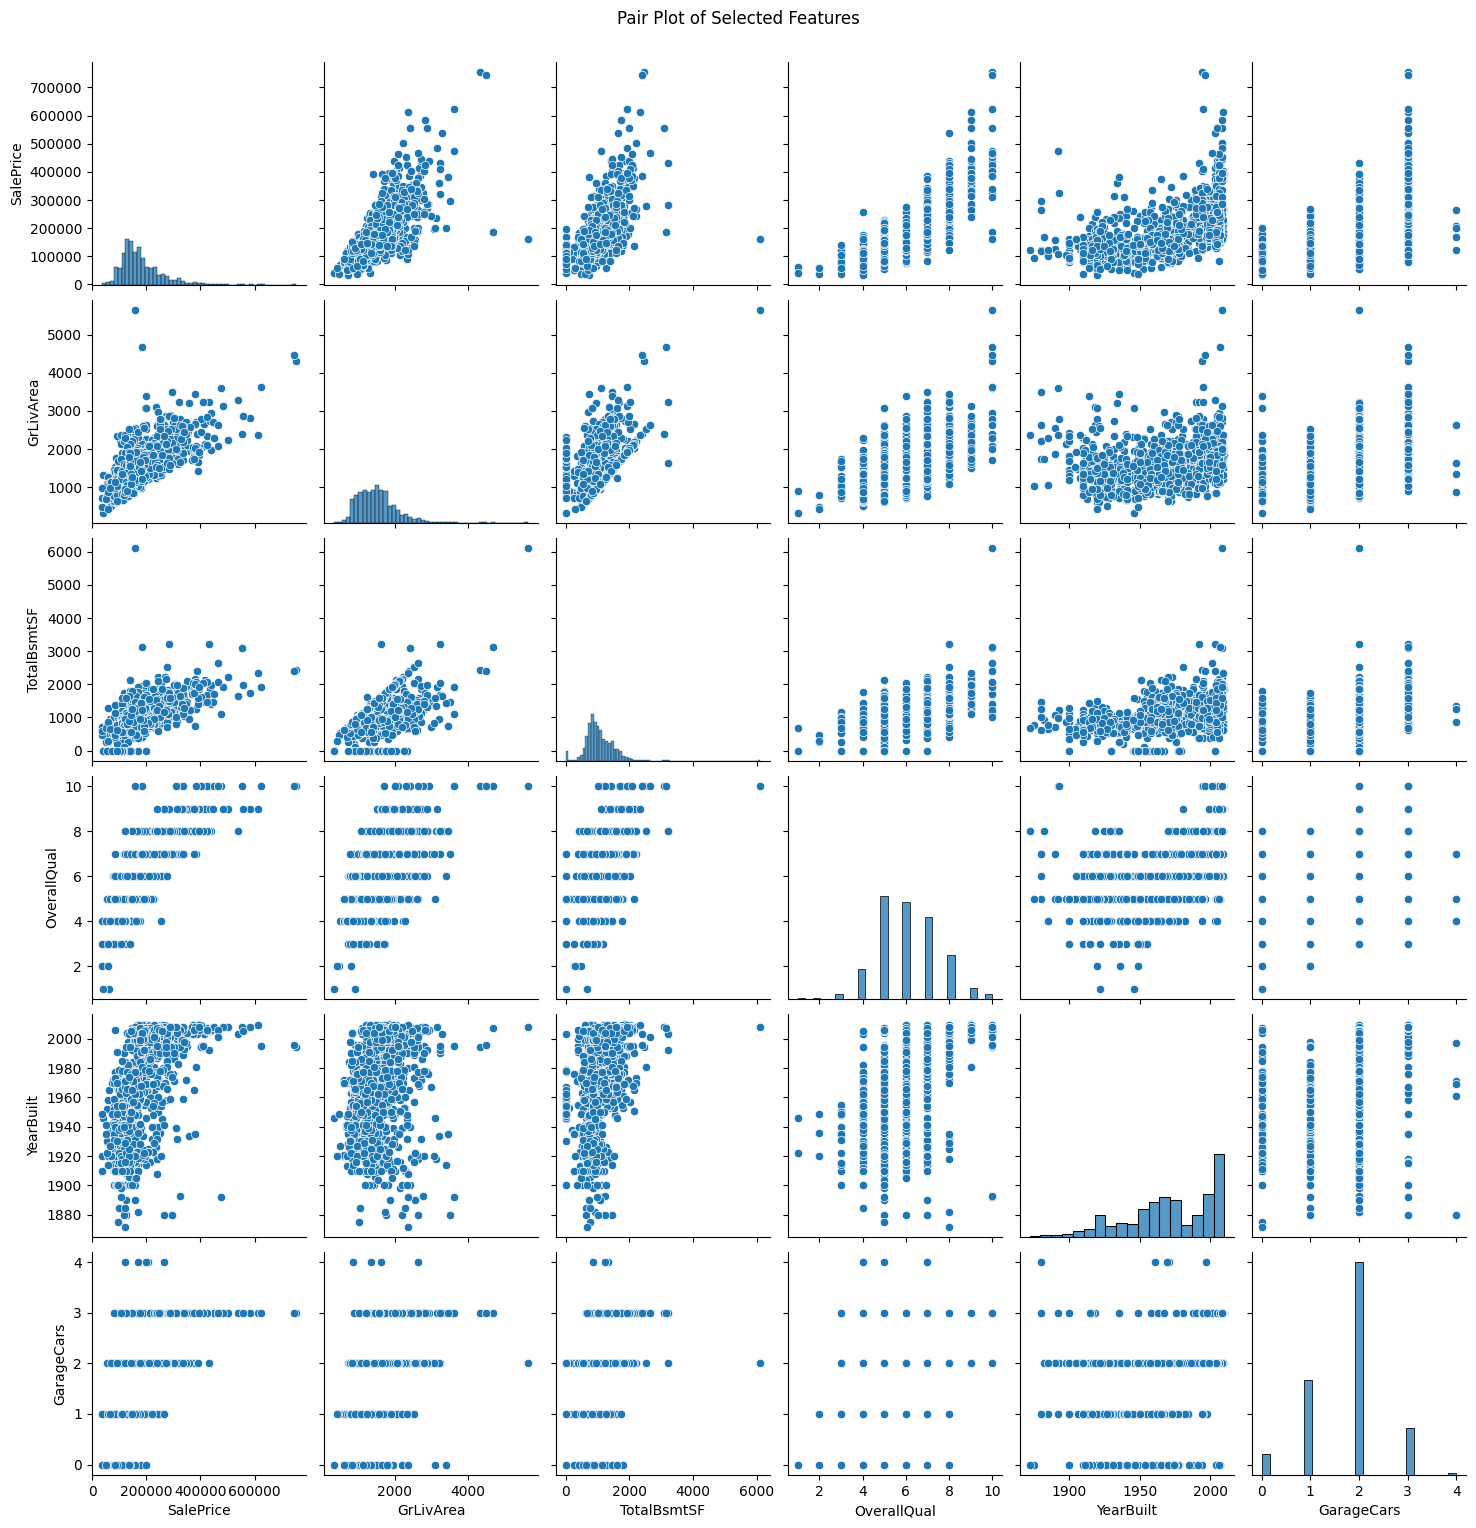

In [17]:
# Pair Plot
sns.pairplot(train[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'YearBuilt', 'GarageCars']])
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()